<H1>Data analysis and machine learning using custom Neural Network (w/o any scify libraries)</H1>
This is my first kernel at Kaggle. I am also a beginner in data science and machine learning.

To understand details and advanced concepts in ML, I thought I'll start with simple concepts for my learning or for anyone else in my position.

As a result, below is a simple neural network made from scratch in python. I will be updating the text explaining the basics of the network and creating new (and simple) network for different datasets as I go along.

Comments/Crits/Corrections welcome. Thanks!

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

<H2>Load Data</H2>

In [4]:
# load iris database
data = pd.read_csv('Iris.csv')
data.sample(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
33,34,5.5,4.2,1.4,0.2,Iris-setosa
18,19,5.7,3.8,1.7,0.3,Iris-setosa
122,123,7.7,2.8,6.7,2.0,Iris-virginica
106,107,4.9,2.5,4.5,1.7,Iris-virginica
80,81,5.5,2.4,3.8,1.1,Iris-versicolor


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


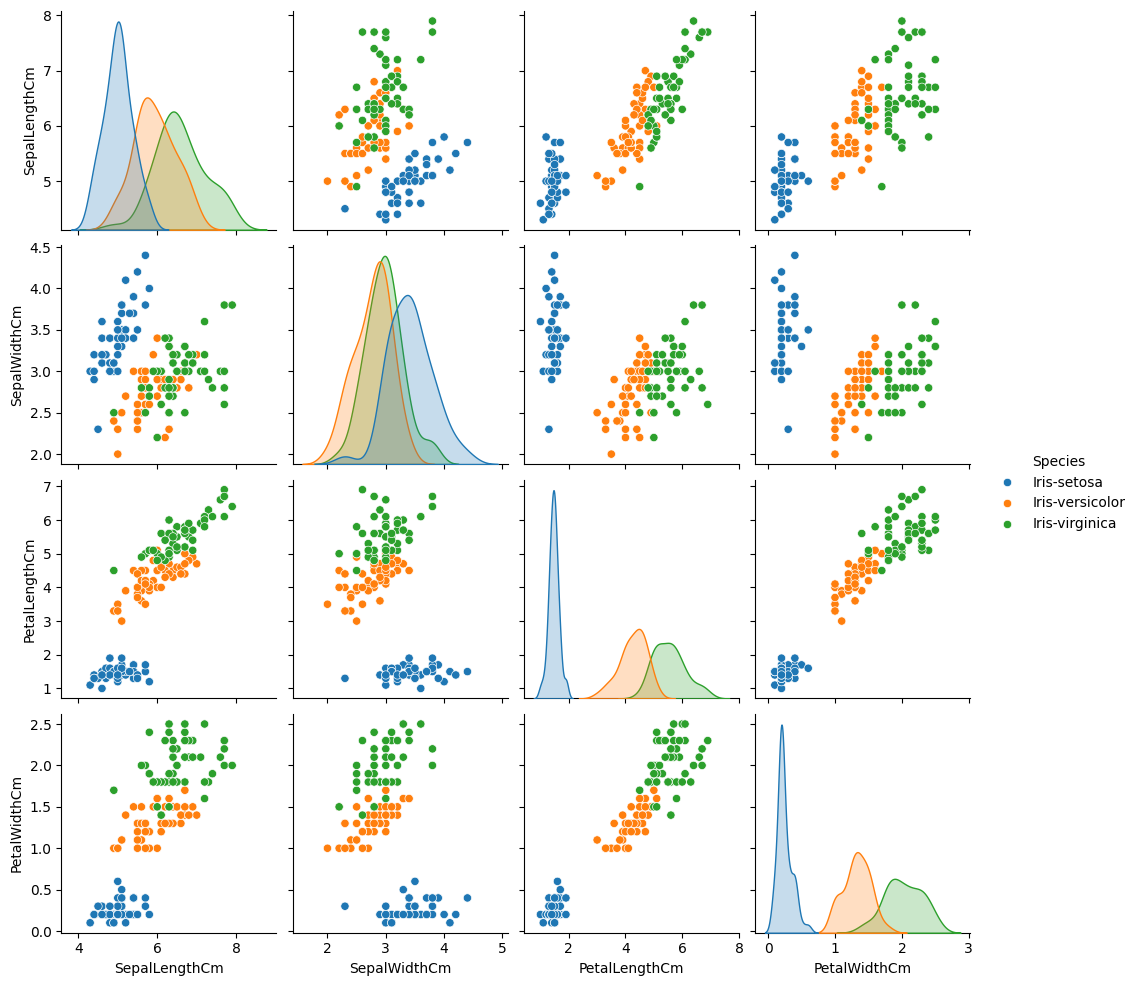

In [6]:
# simple visualization to show how the inputs compare against each other
sns.pairplot( data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species' )

<H2>Normalize the data</H2>

In [7]:
df_norm = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
86,0.666667,0.458333,0.627119,0.583333
34,0.166667,0.458333,0.084746,0.000000
148,0.527778,0.583333,0.745763,0.916667
7,0.194444,0.583333,0.084746,0.041667
132,0.583333,0.333333,0.779661,0.875000


In [8]:
df_norm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Convert the Species labels to indexes for use with neural network.<BR>
Iris-setoso = 0<BR>
Iris-versicolor = 1<BR>
Iris-virginica = 2<BR>

In [9]:
target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
target.sample(n=5)

/tmp/ipykernel_61149/1140345685.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])


,Species
132,2
112,2
65,1
41,0
30,0


In [10]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
70,0.444444,0.500000,0.644068,0.708333,1
81,0.333333,0.166667,0.457627,0.375000,1
83,0.472222,0.291667,0.694915,0.625000,1
43,0.194444,0.625000,0.101695,0.208333,0
128,0.583333,0.333333,0.779661,0.833333,2


<H2>Mark some of the data for testing purpose.</H2>
We'll test our network on unseen data.

In [11]:
train_test_per = 90/100.0
df['train'] = np.random.rand(len(df)) < train_test_per
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,train
60,0.194444,0.000000,0.423729,0.375000,1,True
97,0.527778,0.375000,0.559322,0.500000,1,True
34,0.166667,0.458333,0.084746,0.000000,0,True
17,0.222222,0.625000,0.067797,0.083333,0,True
68,0.527778,0.083333,0.593220,0.583333,1,True


<H2>Separate train and test Data</H2>

In [12]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
19,0.222222,0.750000,0.084746,0.083333,0
24,0.138889,0.583333,0.152542,0.041667,0
149,0.444444,0.416667,0.694915,0.708333,2
80,0.333333,0.166667,0.474576,0.416667,1
45,0.138889,0.416667,0.067797,0.083333,0


In [13]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,0.388889,1.000000,0.084746,0.125000,0
23,0.222222,0.541667,0.118644,0.166667,0
1,0.166667,0.416667,0.067797,0.041667,0
121,0.361111,0.333333,0.661017,0.791667,2
110,0.611111,0.500000,0.694915,0.791667,2


In [14]:
X = train.values[:,:4]
X[:5]

array([[0.08333333, 0.5       , 0.06779661, 0.04166667],
       [0.75      , 0.5       , 0.62711864, 0.54166667],
       [0.22222222, 0.75      , 0.15254237, 0.125     ],
       [0.36111111, 0.20833333, 0.49152542, 0.41666667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ]])

In [15]:
targets = [[1,0,0],[0,1,0],[0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,4:5]])
y[:5]

/tmp/ipykernel_61149/1203936007.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = np.array([targets[int(x)] for x in train.values[:,4:5]])


array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

<H2>Create backpropagating neural network</H2>
Create 3 layers: Input, hidden and Output.

Inputs = length and widths of the species<BR>
Output = 3 values, each one indicating a species. ie Values 1, 0, 0 for the output indicates Iris-setosa<BR>
w1 is a matrices of weight connecting Input and the hidden layer. Each node in input layer connects to each node in the hidden layer.

Weight are randomized between -1 and 1.

In [16]:
num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765],
       [-0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694],
       [ 0.55876584, -0.60462985,  0.72598647,  0.96680135, -0.67231552],
       [ 0.19466789, -0.9820278 , -0.22685743, -0.91167988,  0.91330594]])

<H3>w2 are the weights of connections between hidden layer and output layer.</H3>

In [17]:
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.12770671,  0.89795461,  0.57261197],
       [ 0.7325786 , -0.65366916, -0.85010283],
       [ 0.20148544, -0.66405563,  0.46676034],
       [-0.18311228,  0.05581765,  0.87514317],
       [ 0.04339224, -0.78361323, -0.68355319]])

<H2>Train the network by updating the weights using backpropogation.</H2>
This is the crux of the network. The layers are fed forward using sigmoid activation function. The weighs are then updated based on error using gradient descent.

<pre>
Forward Propagation ( use current weights to caluculate output ):
> node activation = output from previous layer (network inputs in case of first layer) * weights
> node output = sigmoid activation function = 1 / ( 1 + exp( node activation ) )

Backpropagation ( update network weights ):
Error calculation ( how far off we are from the expected values ):
> derivative (different for different activation functions) = output * ( 1 - output )
> error (for the last layer) = ( expected - output ) * derivative
> error (for other layers) = ( error calulated previously * that layer's weight ) * derivative
Update weight based on error caculated:
> Weight = weight + ( output * error * learning rate )
</pre>

In [18]:
# taken from> https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

**A Graphical representations of our network will be something like below**<BR>
The first set of 4 nodes is the input.<BR>
The second set of 5 nodes is the hidden layer. <BR>
The last set of 3 nodes is the output layer.<BR><BR>
All the nodes of a layer are fully connected to all nodes of the next layer.

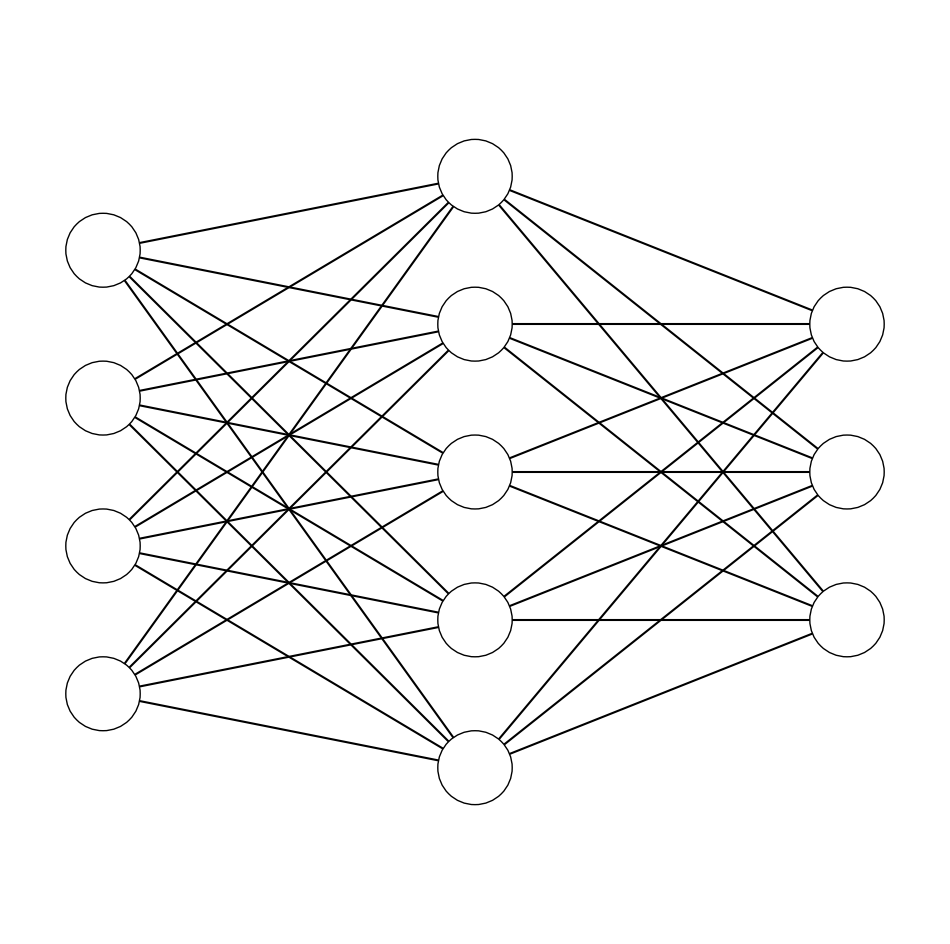

In [19]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 5, 3])

The sigmoid activation function squashes the input values between 0 and 1. This provides a consistant way for the network to deal with outputs.

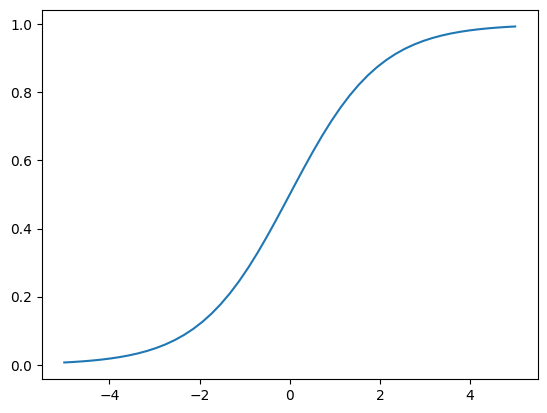

In [20]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

## Training

In [21]:
learning_rate = 0.2 # slowly update the network
error = []
for epoch in range(1000):
    # activate the first layer using the input
    #   matrix multiplication between the input and the layer 1 weights
    #   result is fed into a sigmoid function
    l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
    # activate the second layer using first layer as input
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    # find the average errorof this batch
    #   using absolute, can use use square as well
    er = (abs(y - l2)).mean()
    error.append(er)
    
    # BACKPROPAGATION / learning!
    # find contribution of error on each weight on the second layer
    l2_delta = (y - l2)*(l2 * (1-l2))
    # update each weight in the second layer slowly
    w2 += l1.T.dot(l2_delta) * learning_rate
    
    # find contribution of error on each weight on the second layer w.r.t the first layer
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    # udpate weights in the first layer
    w1 += X.T.dot(l1_delta) * learning_rate
    
print('Error:', er)

Error: 0.117397351541248


### Plotting Error

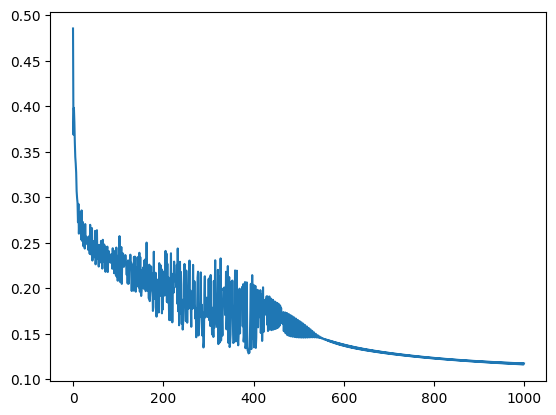

In [22]:
plt.plot(error)

<H2>Test the network for accuracy.</H2>
Run the network with the updated weights from training.

In [23]:
X = test.values[:,:4]
y = np.array([targets[int(x)] for x in test.values[:,4:5]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)

/tmp/ipykernel_61149/1707073107.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = np.array([targets[int(x)] for x in test.values[:,4:5]])


array([[0.996, 0.009, 0.003],
       [0.997, 0.001, 0.021],
       [0.997, 0.002, 0.008],
       [0.994, 0.   , 0.036],
       [0.992, 0.002, 0.006],
       [0.997, 0.006, 0.004],
       [0.998, 0.007, 0.005],
       [0.001, 0.843, 0.046],
       [0.001, 0.838, 0.047],
       [0.01 , 0.998, 0.   ],
       [0.   , 0.028, 0.956],
       [0.   , 0.034, 0.947],
       [0.   , 0.026, 0.967],
       [0.   , 0.021, 0.971]])

From the above maxtrix we take the maximum value (per row), which forms our predictions...

In [24]:
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)

testres = test[['Species']].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

             Species       Prediction
1        Iris-setosa      Iris-setosa
6        Iris-setosa      Iris-setosa
11       Iris-setosa      Iris-setosa
15       Iris-setosa      Iris-setosa
23       Iris-setosa      Iris-setosa
29       Iris-setosa      Iris-setosa
38       Iris-setosa      Iris-setosa
74   Iris-versicolor  Iris-versicolor
84   Iris-versicolor  Iris-versicolor
88   Iris-versicolor  Iris-versicolor
109   Iris-virginica   Iris-virginica
110   Iris-virginica   Iris-virginica
121   Iris-virginica   Iris-virginica
139   Iris-virginica   Iris-virginica
Correct: 14 / 14 : 100.0 %
